## **1. Mount google drive**
---

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


## **2. Import the necessary libraries**
---

In [2]:
import matplotlib
import sklearn
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import tensorflow as tf
import os


from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model


print("Versions of key libraries")
print("---")
print("tensorflow: ", tf.__version__)
print("numpy:      ", np.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)

Versions of key libraries
---
tensorflow:  2.2.0
numpy:       1.18.5
matplotlib:  3.2.2
sklearn:     0.22.2.post1


In [3]:
print("tensorflow: ", tf.__version__)

tensorflow:  2.2.0


## **3.Create a function to plot the japanese character correctly**
---

In [4]:
def grayplt(img,title=''):
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(img[:,:,0],cmap='gray',vmin=0,vmax=1)
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=1)
    plt.title(title, fontproperties=prop)
    plt.show()

print(grayplt)

<function grayplt at 0x7fceb1b57bf8>


## **4. Setup matplotlib**
---

In [5]:
                                          # Setting up the font manager, so that
                                          # it can show japanese characters correctly
from matplotlib import font_manager as fm
fpath       = os.path.join(os.getcwd(), "ipam.ttf")
prop        = fm.FontProperties(fname=fpath)

plt.style.use('seaborn') 
plt.rcParams['ytick.right']     = True
plt.rcParams['ytick.labelright']= True
plt.rcParams['ytick.left']      = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['figure.figsize']  = [7,7]   # Set the figure size to be 7 inch for (width,height)

print("Matplotlib setup completes.")

Matplotlib setup completes.


## **5. Prepare data for training and testing**
---
* Step 1: Load the dataset 
* Step 2: Check the shape and type of the data, plot a sample for observation
* Step 3: Convert the data into float32 and rescale the values from the range of 0\~255 into 0\~1
* Step 4: Retrieve the row size and the column size of each image
* Step 5: Reshape training and testing data to be in the form of `[samples,rows,columns,channel]`. This is required by Keras framework
* Step 6: Perform one-hot enconding on the labels
* Step 7: Retrieve the number of classes in this problem

The shape of trDat is (60000, 28, 28) and the type of trDat is uint8
The shape of tsDat is (10000, 28, 28) and the type of tsDat is uint8

The shape of trLbl is (60000,) and the type of trLbl is uint8
The shape of tsLbl is (10000,) and the type of tsLbl is uint8



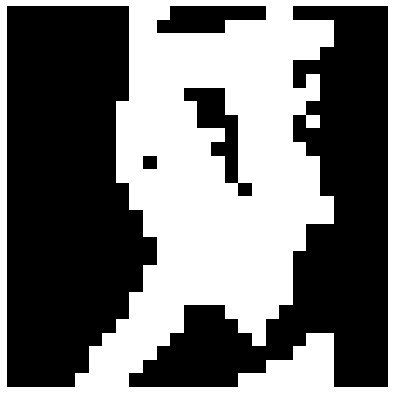

In [6]:
                                                                                # Step 1
trDat       = np.load('/content/gdrive/My Drive/Colab Notebooks/psupr_workshop/kmnist-train-imgs.npz')['arr_0']
trLbl       = np.load('/content/gdrive/My Drive/Colab Notebooks/psupr_workshop/kmnist-train-labels.npz')['arr_0']
tsDat       = np.load('/content/gdrive/My Drive/Colab Notebooks/psupr_workshop/kmnist-test-imgs.npz')['arr_0']
tsLbl       = np.load('/content/gdrive/My Drive/Colab Notebooks/psupr_workshop/kmnist-test-labels.npz')['arr_0']

                                                                                # Step 2
print("The shape of trDat is", trDat.shape, "and the type of trDat is", trDat.dtype)
print("The shape of tsDat is", tsDat.shape, "and the type of tsDat is", tsDat.dtype)
print("")
print("The shape of trLbl is", trLbl.shape, "and the type of trLbl is", trLbl.dtype)
print("The shape of tsLbl is", tsLbl.shape, "and the type of tsLbl is", tsLbl.dtype)
print("")
grayplt(trDat[132])

                                                                                # Step 3
trDat           = trDat.astype('float32')/255
tsDat           = tsDat.astype('float32')/255

                                                                                # Step 4
imgrows         = trDat.shape[1]
imgclms         = trDat.shape[2]

                                                                                # Step 5
trDat       = trDat.reshape(trDat.shape[0],
                            imgrows,
                            imgclms,
                            1)
tsDat       = tsDat.reshape(tsDat.shape[0],
                            imgrows,
                            imgclms,
                            1)

                                                                                # Step 6
trLbl           = to_categorical(trLbl)
tsLbl           = to_categorical(tsLbl)
                               
num_classes     = tsLbl.shape[1]                                                # Step 7

## **6. Define deep learning model (to be completed)**
___
* Step 1: Set a name for the coming model (required for saving)
* Step 2: Define the convolutional neural network model (to be completed)
* Step 3: Create models for training and testing
* Step 4: Display the summary of the model of interest 

In [7]:
modelname   = 'wks5_5'                                                          # Step 1

from tensorflow.keras.optimizers import SGD                                                  
                                                                                # Step 2
def createModel():
    model = Sequential()  #initializing the model
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='glorot_uniform', input_shape=(imgrows, imgclms, 1)))   
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))     
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    opt = SGD(lr=0.02, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

                                                                                # Step 3
model       = createModel() # This is meant for training
modelGo     = createModel() # This is used for final testing

model.summary()                                                                        # Step 4

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               640100    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## **7. Create the callbacks to be applied during training**
---
* Step 1: Create a callback to save the model from an epoch when validation accuracy is the highest
* Step 2: Create a callback to save the training loss, training accuracy, validation loss and validation accuracy of each epoch into a csv file
* Step 3: Put the two callbacks objects into a list

In [8]:
                                                                                # Step 1
folderpath      = '/content/gdrive/My Drive/Colab Notebooks/psupr_workshop/'
filepath        = folderpath + modelname + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

csv_logger      = CSVLogger(folderpath+modelname +'.csv')                       # Step 2
callbacks_list  = [checkpoint,csv_logger]                                       # Step 3

print("Callbacks created:")
print(callbacks_list[0])
print(callbacks_list[1])
print('')
print("Path to model:", filepath)
print("Path to log:  ", folderpath+modelname+'.csv')

Callbacks created:

Path to model: /content/gdrive/My Drive/Colab Notebooks/psupr_workshop/wks5_5.hdf5
Path to log:   /content/gdrive/My Drive/Colab Notebooks/psupr_workshop/wks5_5.csv


## **8. Train the deep learning model**
___

In [9]:
model.fit(trDat,                            # Training data
          trLbl,                            # Training label
          validation_data=(tsDat, tsLbl),   # Validation data and label
          epochs=20,                       # The amount of epochs to be trained
          batch_size=50,                   
          shuffle=True,                     # To shuffle the training data
          callbacks=callbacks_list)         # Callbacks to execute the checkpoints

Epoch 1/20
1200/1200 [==============================] - 9s 8ms/step - loss: 0.3499 - accuracy: 0.8900 - val_loss: 0.3206 - val_accuracy: 0.9084
Epoch 2/20
1200/1200 [==============================] - 9s 8ms/step - loss: 0.1116 - accuracy: 0.9667 - val_loss: 0.2368 - val_accuracy: 0.9358
Epoch 3/20
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0688 - accuracy: 0.9786 - val_loss: 0.2272 - val_accuracy: 0.9404
Epoch 4/20
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.2026 - val_accuracy: 0.9486
Epoch 5/20
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.2255 - val_accuracy: 0.9409
Epoch 6/20
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.2063 - val_accuracy: 0.9511
Epoch 7/20
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.2330 - val_accuracy:

## **9. Validate the deep learning model**
---
* Step 1: Load the trained weights and compile the model
* Step 2: Make prediction


In [10]:
                                                                                # Step 1
modelGo.load_weights(filepath)
modelGo.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])

predicts    = modelGo.predict(tsDat)                                            # Step 2
print("Prediction completes.")

Prediction completes.


## **10. Report classification metrics**
---
* Step 1: Setup the label
* Step 2: Convert label from one-hot to integer
* Step 3: Calculate the accuracy score
* Step 4: Generate classification report

In [11]:
                                                                                # Step 1
labelname   = ['お O','き Ki','す Su','つ Tsu','な Na','は Ha','ま Ma','や Ya','れ Re','を Wo']
                                                                                # Step 2
predout     = np.argmax(predicts,axis=1)
testout     = np.argmax(tsLbl,axis=1)

testScores  = metrics.accuracy_score(testout,predout)                           # Step 3

                                                                                # Step 4
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names=labelname,
                                    digits=4))

Best accuracy (on testing dataset): 96.06%
              precision    recall  f1-score   support

         お O     0.9680    0.9670    0.9675      1000
        き Ki     0.9680    0.9390    0.9533      1000
        す Su     0.9299    0.9420    0.9359      1000
       つ Tsu     0.9749    0.9720    0.9735      1000
        な Na     0.9537    0.9480    0.9509      1000
        は Ha     0.9666    0.9540    0.9602      1000
        ま Ma     0.9339    0.9750    0.9540      1000
        や Ya     0.9748    0.9680    0.9714      1000
        れ Re     0.9646    0.9810    0.9727      1000
        を Wo     0.9736    0.9600    0.9668      1000

    accuracy                         0.9606     10000
   macro avg     0.9608    0.9606    0.9606     10000
weighted avg     0.9608    0.9606    0.9606     10000



## **11. Print confusion matrix**
---

In [12]:
confusion   = metrics.confusion_matrix(testout,predout)
print(confusion)

[[967   2   0   1  13   3   0   4   5   5]
 [  0 939   9   1   7   3  26   1   8   6]
 [  6   3 942   6  10   8  14   5   1   5]
 [  1   0  14 972   1   4   4   2   2   0]
 [ 11   4   1   6 948   8   6   4   9   3]
 [  2   3  18   3   2 954   8   1   5   4]
 [  2   4  11   3   2   1 975   2   0   0]
 [  1   6   6   1   4   3   7 968   1   3]
 [  1   4   5   3   2   1   3   0 981   0]
 [  8   5   7   1   5   2   1   6   5 960]]


## **12. Plot curves on validation loss and accuracy**
---

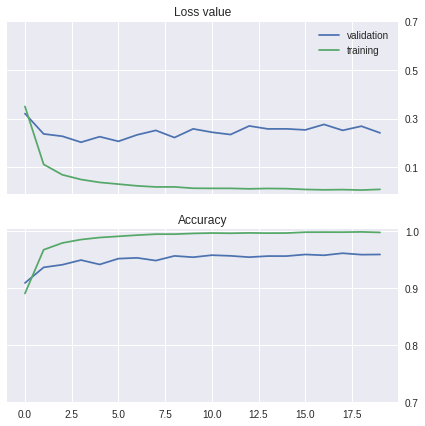

In [13]:
records     = pd.read_csv(folderpath+modelname +'.csv')
plt.figure()
plt.subplot(211)
plt.plot(records['val_loss'], label="validation")
plt.plot(records['loss'],label="training")
plt.yticks([0.10,0.30,0.50,0.70])
plt.title('Loss value',fontsize=12)

ax          = plt.gca()
ax.set_xticklabels([])

plt.subplot(212)
plt.plot(records['val_accuracy'],label="validation")
plt.plot(records['accuracy'],label="training")
plt.yticks([0.7,0.8,0.9,1.0])
plt.title('Accuracy',fontsize=12)
ax.legend()
plt.show()

## **13. Save the model plot**
---

In [14]:
plotpath  = folderpath+modelname+'_plot.png'
plot_model(model, 
           to_file=plotpath, 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB')

print("Path to plot:", plotpath)

Path to plot: /content/gdrive/My Drive/Colab Notebooks/psupr_workshop/wks5_5_plot.png
